In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import xgboost as xgb
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("HR_comma_sep.csv")

In [3]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_monthly_hours  14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  int32  
 9   salary                 14999 non-null  int64  
dtypes: float64(2), int32(1), int64(7)
memory usage: 1.1 MB


In [5]:
df["sales"].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

In [6]:
df["salary"].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [7]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [8]:
df["salary"]=df["salary"].replace({"high":2,"low":0,"medium":1})

In [29]:
df = df.rename(columns={"sales":"department", "average_montly_hours":"average_monthly_hours"})

<AxesSubplot:xlabel='left', ylabel='count'>

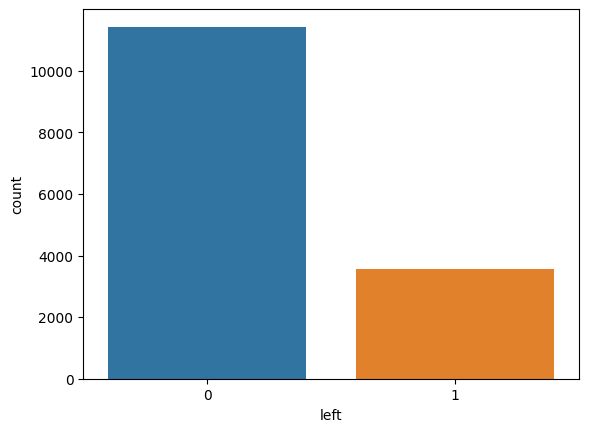

In [67]:
sns.countplot(df.left)

In [93]:
#Data is imbalanced 

<AxesSubplot:xlabel='salary', ylabel='count'>

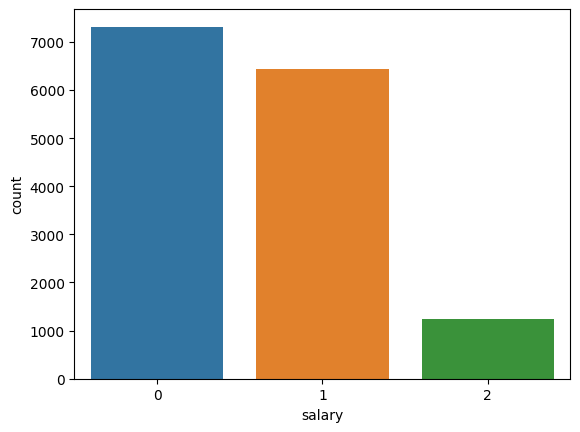

In [30]:
sns.countplot(df.salary)

<AxesSubplot:xlabel='promotion_last_5years', ylabel='count'>

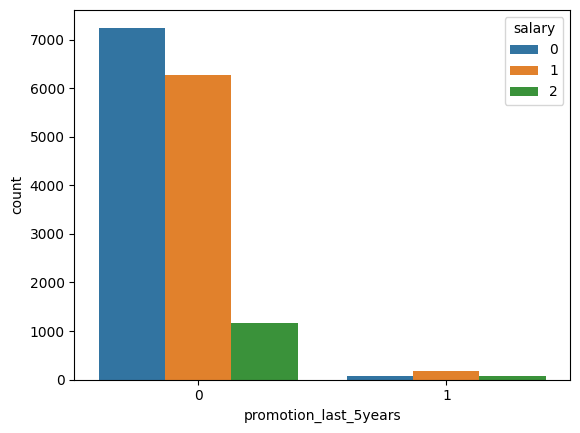

In [31]:
sns.countplot(df.promotion_last_5years,hue=df["salary"])

<AxesSubplot:xlabel='department', ylabel='count'>

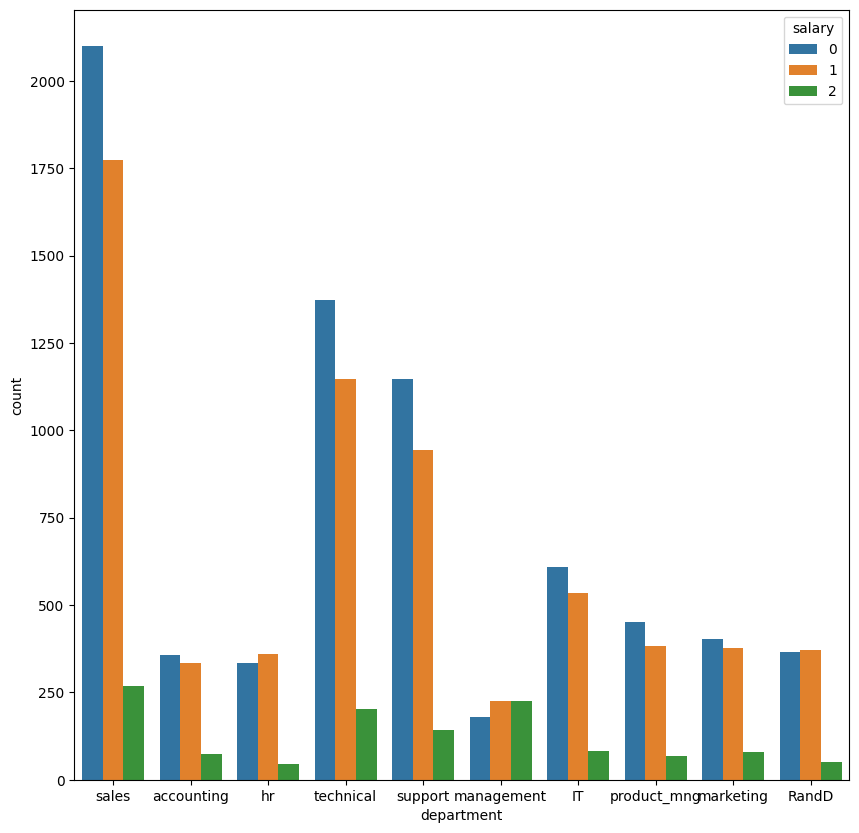

In [34]:
plt.figure(figsize=(10,10))
sns.countplot(df.department,hue=df["salary"])

In [35]:
#sales_department has highest no. of employee with highest salary 
#management department has less employee highest

<AxesSubplot:xlabel='department', ylabel='count'>

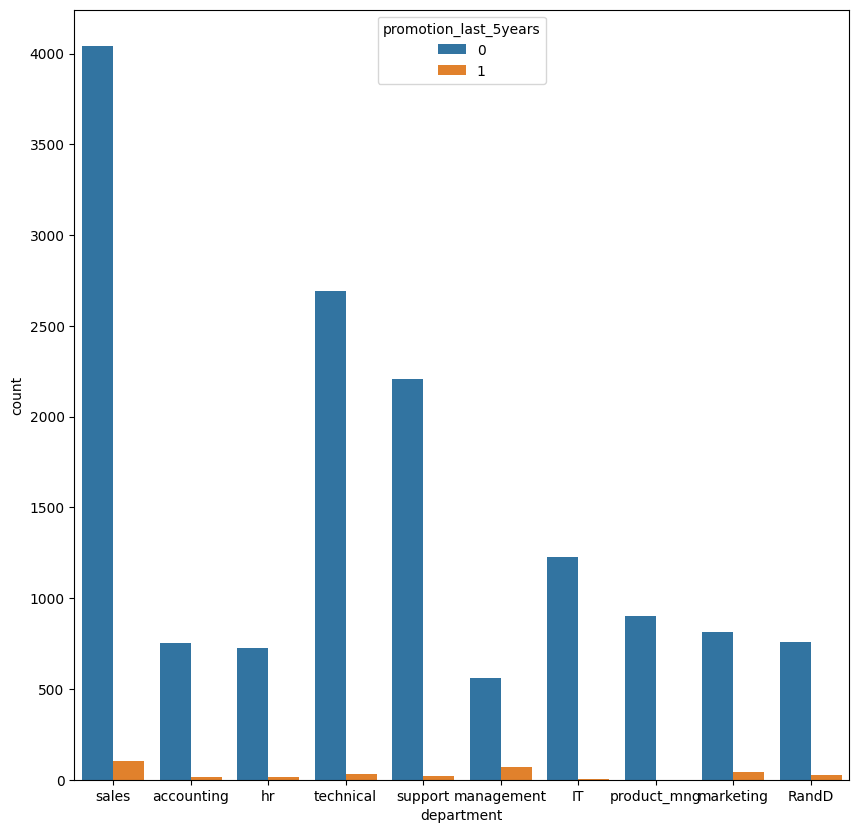

In [37]:
plt.figure(figsize=(10,10))
sns.countplot(df.department,hue=df["promotion_last_5years"])

In [38]:
#product management department has got very less promotion
#sales dept has highest promotion rate ,followed by management

<AxesSubplot:xlabel='left', ylabel='count'>

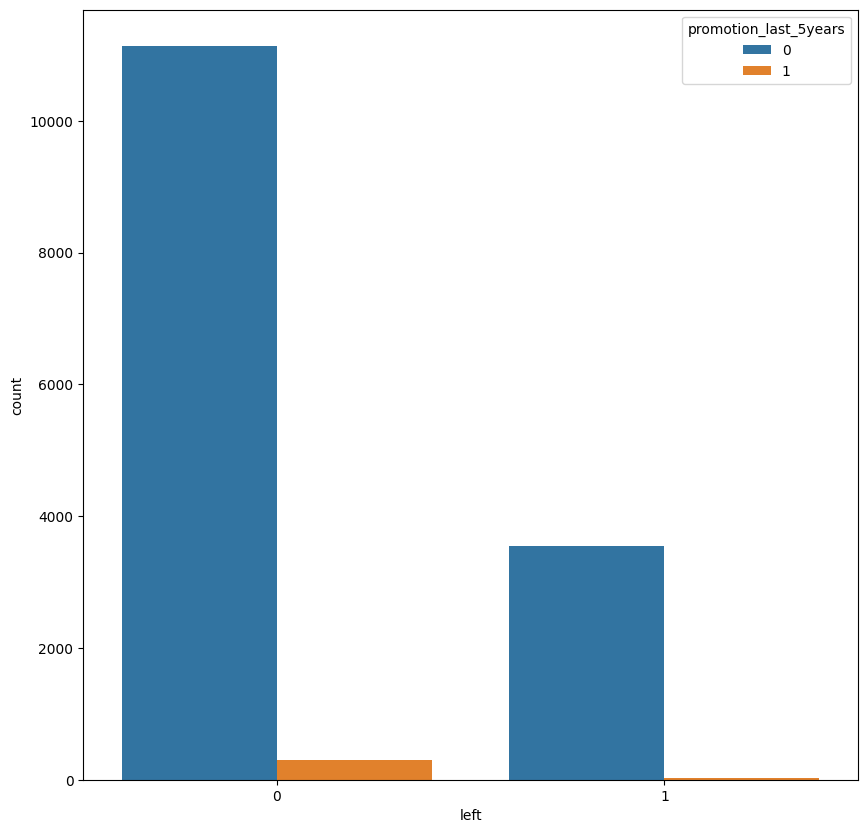

In [39]:
plt.figure(figsize=(10,10))
sns.countplot(df.left,hue=df["promotion_last_5years"])

In [40]:
#Most of people who didn't get promotion still work in the companys

In [41]:
from sklearn.preprocessing import LabelEncoder

In [42]:
le=LabelEncoder()

In [44]:
co_cols=df.select_dtypes(include='O').columns
co_cols

Index(['department'], dtype='object')

In [45]:
for i in co_cols:
    df[i]=le.fit_transform(df[i])

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
sc=StandardScaler()

In [48]:
from sklearn.model_selection import train_test_split

In [51]:
X=df.drop("left",axis=1)
y=df["left"]

In [69]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(sampling_strategy='auto')
X_sm,y_sm=sm.fit_resample(X,y)

In [70]:
X_train,X_test,y_train,y_test=train_test_split(X_sm,y_sm,test_size=0.20,random_state=123)

In [71]:
X_train.shape

(18284, 9)

In [72]:
X_test.shape

(4572, 9)

In [73]:
y_train.shape



(18284,)

In [74]:
y_test.shape

(4572,)

In [75]:
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

In [86]:
lr=LogisticRegression()
rfc=RandomForestClassifier()
dt=DecisionTreeClassifier()
sv=SVC()

In [87]:
from sklearn.metrics import classification_report
def my_model(model):
    model.fit(X_train,y_train)
    y_pred_train=model.predict(X_train)
    y_pred_test=model.predict(X_test)
    print("train data")
    print(classification_report(y_train,y_pred_train))
    print("test data")
    print(classification_report(y_test,y_pred_test))
    return model 

In [88]:
my_model(lr)

train data
              precision    recall  f1-score   support

           0       0.82      0.76      0.79      9119
           1       0.78      0.84      0.80      9165

    accuracy                           0.80     18284
   macro avg       0.80      0.80      0.80     18284
weighted avg       0.80      0.80      0.80     18284

test data
              precision    recall  f1-score   support

           0       0.81      0.74      0.77      2309
           1       0.75      0.82      0.78      2263

    accuracy                           0.78      4572
   macro avg       0.78      0.78      0.78      4572
weighted avg       0.78      0.78      0.78      4572



LogisticRegression()

In [89]:
my_model(rfc)

train data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9119
           1       1.00      1.00      1.00      9165

    accuracy                           1.00     18284
   macro avg       1.00      1.00      1.00     18284
weighted avg       1.00      1.00      1.00     18284

test data
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2309
           1       0.99      0.97      0.98      2263

    accuracy                           0.98      4572
   macro avg       0.98      0.98      0.98      4572
weighted avg       0.98      0.98      0.98      4572



RandomForestClassifier()

In [90]:
my_model(dt)

train data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9119
           1       1.00      1.00      1.00      9165

    accuracy                           1.00     18284
   macro avg       1.00      1.00      1.00     18284
weighted avg       1.00      1.00      1.00     18284

test data
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      2309
           1       0.94      0.96      0.95      2263

    accuracy                           0.95      4572
   macro avg       0.95      0.95      0.95      4572
weighted avg       0.95      0.95      0.95      4572



DecisionTreeClassifier()

In [91]:
my_model(sv)

train data
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      9119
           1       0.97      0.93      0.95      9165

    accuracy                           0.95     18284
   macro avg       0.95      0.95      0.95     18284
weighted avg       0.95      0.95      0.95     18284

test data
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      2309
           1       0.96      0.93      0.94      2263

    accuracy                           0.94      4572
   macro avg       0.94      0.94      0.94      4572
weighted avg       0.94      0.94      0.94      4572



SVC()